<center><h1>KaZR Contents</h1>
<h3> <i>Scott Collis</i></h3>
</center>

In [1]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [9]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx


To start with we will access a general mode KaZR file from my local file system. This will have to be adjusted for your install 

In [2]:
filename = '/data/radar/oli_kazr/olikazrgeM1.a1.20160620.000001.nc'
radar = pyart.io.read(filename)

What variables do we have

In [3]:
print(radar.fields.keys())

dict_keys(['reflectivity', 'snr_xpol', 'spectral_width', 'co_to_crosspol_correlation_coeff', 'snr_copol', 'linear_depolarization_ratio', 'mean_doppler_velocity'])


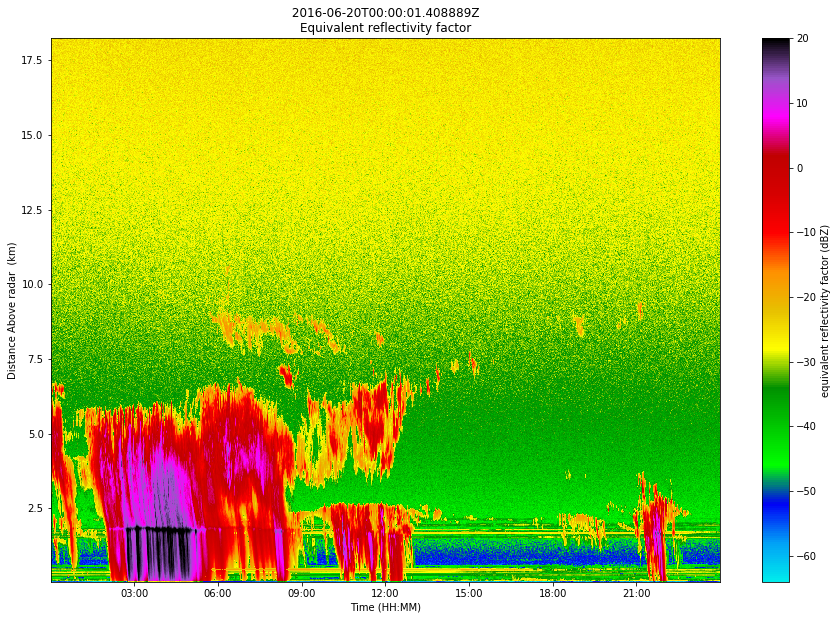

In [19]:
my_display = pyart.graph.RadarDisplay(radar)
my_fig = plt.figure(figsize = [15,10])

my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True)


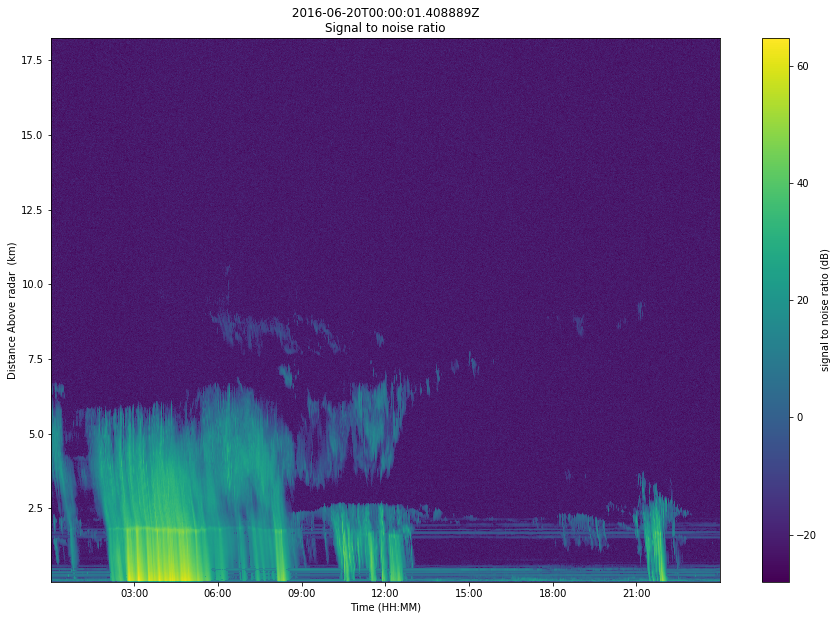

In [20]:
my_display = pyart.graph.RadarDisplay(radar)
my_fig = plt.figure(figsize = [15,10])

my_display.plot_vpt('snr_copol', time_axis_flag=True)


(10, 17.5)

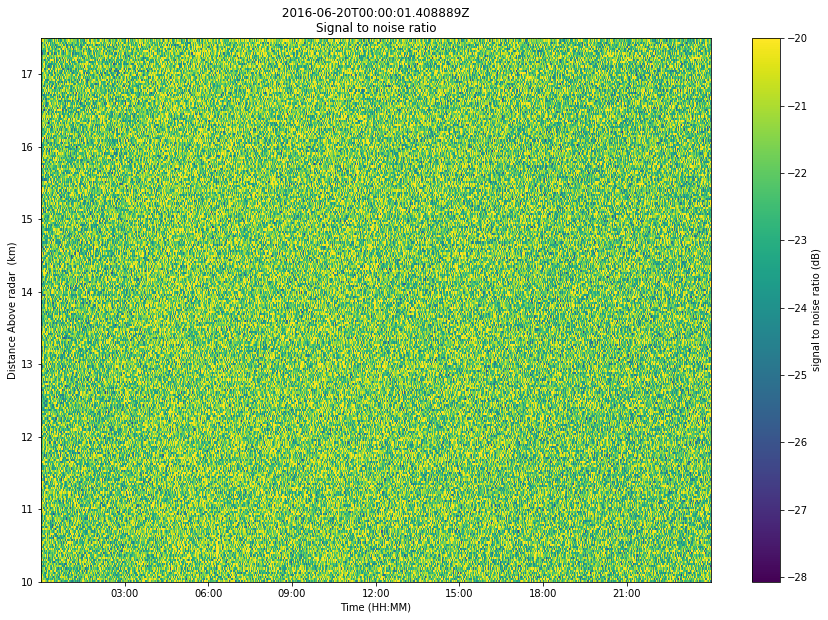

In [22]:
my_display = pyart.graph.RadarDisplay(radar)
my_fig = plt.figure(figsize = [15,10])

my_display.plot_vpt('snr_copol', time_axis_flag=True, vmax = -20)
plt.ylim([10,17.5])

Hmmm.. no real signal there... Lets look at returns above 12.5km to get an idea of sky noise. This is quick and dirty

In [24]:
toa = 12.5*1000.0
snr = radar.fields['snr_copol']['data']
ranges = radar.range['data']
cloud_top_gate = find_nearest(ranges, toa)
mean_snr_clear = snr[:, cloud_top_gate::].mean(axis=1)

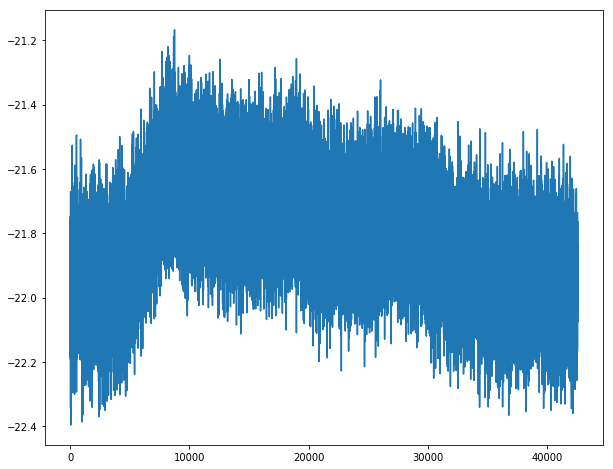

In [25]:
fig = plt.figure(figsize = [10,8])
plt.plot(mean_snr_clear)

lets just take a look at the mean signal

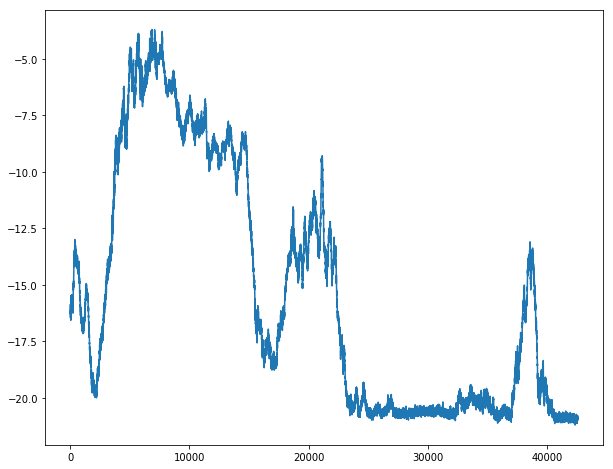

In [26]:
mean_total = snr.mean(axis=1)
fig = plt.figure(figsize = [10,8])
plt.plot(mean_total)